In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
archivo = "Sample - Superstore.xls"  # Cambia por tu archivo

# Leer hojas
ordenes = pd.read_excel(archivo, sheet_name=0)
devoluciones = pd.read_excel(archivo, sheet_name=1)
personas = pd.read_excel(archivo, sheet_name=2)

ordenes.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [12]:
for col in ['Sales', 'Profit', 'Discount']:
    ordenes[col] = ordenes[col].astype(str).str.replace(',', '.').astype(float)

ordenes['Order Date'] = pd.to_datetime(ordenes['Order Date'], dayfirst=True, errors='coerce')

ordenes.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [13]:
#Unir con devoluciones y personas
ordenes = ordenes.merge(devoluciones, on='Order ID', how='left')
ordenes['Returned'] = ordenes['Returned'].fillna('No')

ordenes = ordenes.merge(personas, on='Region', how='left')

ordenes.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned,Person
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,No,Cassandra Brandow
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,No,Cassandra Brandow
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,No,Anna Andreadi
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,No,Cassandra Brandow
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,No,Cassandra Brandow


In [14]:
#Impacto de las devoluciones
dev_stats = ordenes.groupby('Returned')[['Sales', 'Profit']].sum()
dev_stats

,Sales,Profit
Returned,,
No,2.116697e+06,263164.6602
Yes,1.805043e+05,23232.3615


In [15]:
#Ventas por persona
ventas_persona = ordenes.groupby('Person')['Sales'].sum().sort_values(ascending=False)
ventas_persona

Person
Anna Andreadi        725457.8245
Chuck Magee          678781.2400
Kelly Williams       501239.8908
Cassandra Brandow    391721.9050
Name: Sales, dtype: float64

C:\Users\camil\AppData\Local\Temp\ipykernel_35796\3475002411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ordenes, x='Returned', palette='pastel')


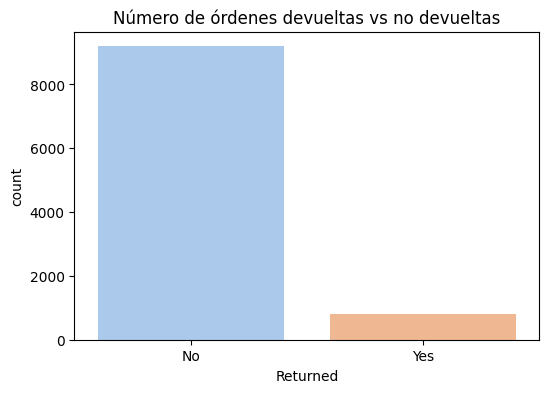

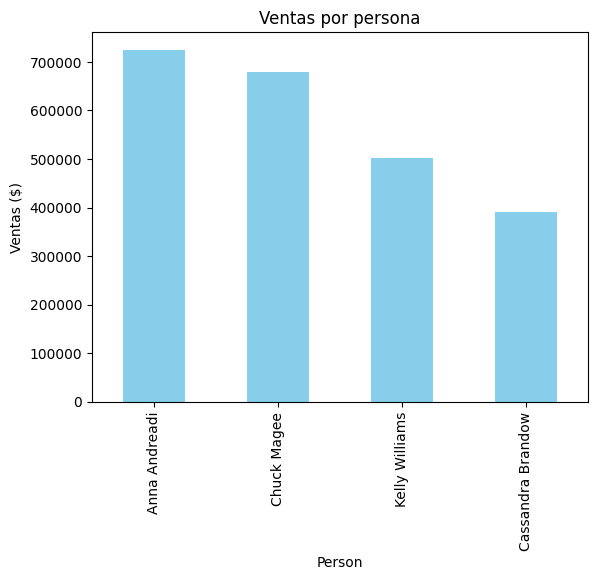

In [16]:
#Gráficos
plt.figure(figsize=(6,4))
sns.countplot(data=ordenes, x='Returned', palette='pastel')
plt.title("Número de órdenes devueltas vs no devueltas")
plt.show()

ventas_persona.plot(kind='bar', color='skyblue')
plt.title("Ventas por persona")
plt.ylabel("Ventas ($)")
plt.show()

In [17]:
ordenes.to_csv("ventas_con_devoluciones_persona.csv", index=False)

In [18]:
plt.style.use('seaborn-v0_8')
sns.set_palette("pastel")

In [19]:
total_ventas = ordenes['Sales'].sum()
total_ganancia = ordenes['Profit'].sum()
total_ordenes = ordenes['Order ID'].nunique()
ticket_promedio = total_ventas / total_ordenes

print(f"💰 Ventas totales: ${total_ventas:,.2f}")
print(f"📈 Ganancia total: ${total_ganancia:,.2f}")
print(f"🛒 Órdenes totales: {total_ordenes}")
print(f"💳 Ticket promedio: ${ticket_promedio:,.2f}")

💰 Ventas totales: $2,297,200.86
📈 Ganancia total: $286,397.02
🛒 Órdenes totales: 5009
💳 Ticket promedio: $458.61


Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

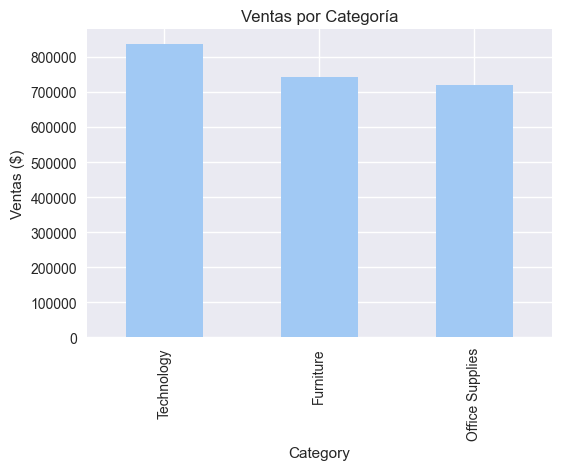

In [20]:
#Ventas por categoria
ventas_categoria = ordenes.groupby('Category')['Sales'].sum().sort_values(ascending=False)
display(ventas_categoria)

ventas_categoria.plot(kind='bar', figsize=(6,4))
plt.title("Ventas por Categoría")
plt.ylabel("Ventas ($)")
plt.show()

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

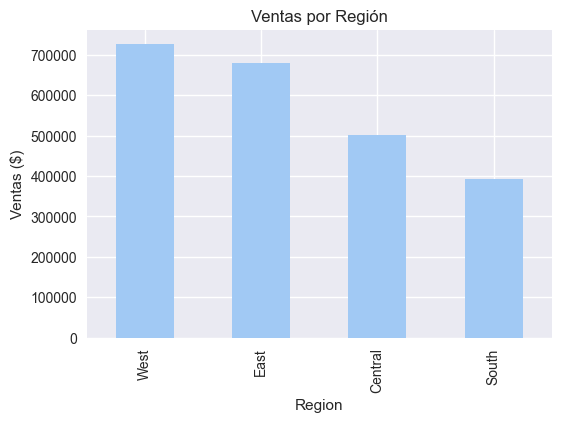

In [21]:
#Ventas por Region
ventas_region = ordenes.groupby('Region')['Sales'].sum().sort_values(ascending=False)
display(ventas_region)

ventas_region.plot(kind='bar', figsize=(6,4))
plt.title("Ventas por Región")
plt.ylabel("Ventas ($)")
plt.show()